<a href="https://colab.research.google.com/github/MelaOchoa/LosCapis/blob/main/Los_Capis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
datos = pd.read_csv("datos.csv")

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperatura    600 non-null    float64
 1   Epoca          600 non-null    int64  
 2   Tinmueble      600 non-null    int64  
 3   Nocupantes     600 non-null    int64  
 4   UsoDiario      600 non-null    int64  
 5   Iluminacion    600 non-null    int64  
 6   ConsumoDiario  600 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 32.9 KB


In [ ]:
datos.head()

,Temperatura,Epoca,Tinmueble,Nocupantes,UsoDiario,Iluminacion,ConsumoDiario
0,11.30,1,258,2,12,3,103.550
1,27.54,2,288,6,1,3,130.910
2,4.03,4,272,4,7,3,120.445
3,4.16,2,168,5,6,1,101.840
4,-4.55,1,106,5,8,3,52.375


<ipython-input-11-2a02c755c21b>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=factor, y="ConsumoDiario", data=datos, palette="coolwarm")
<ipython-input-11-2a02c755c21b>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=factor, y="ConsumoDiario", data=datos, palette="coolwarm")
<ipython-input-11-2a02c755c21b>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=factor, y="ConsumoDiario", data=datos, palette="coolwarm")
<ipython-input-11-2a02c755c21b>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=factor, y="ConsumoDiario", data=datos, palette="coolwarm")
<ipython-input-11-2a02c755c21b>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.scatterplot(x=factor, y="ConsumoDiario", data=datos, palette="coolwarm")
<ipython-input-11-2a02c755c21b>:14: UserWarni

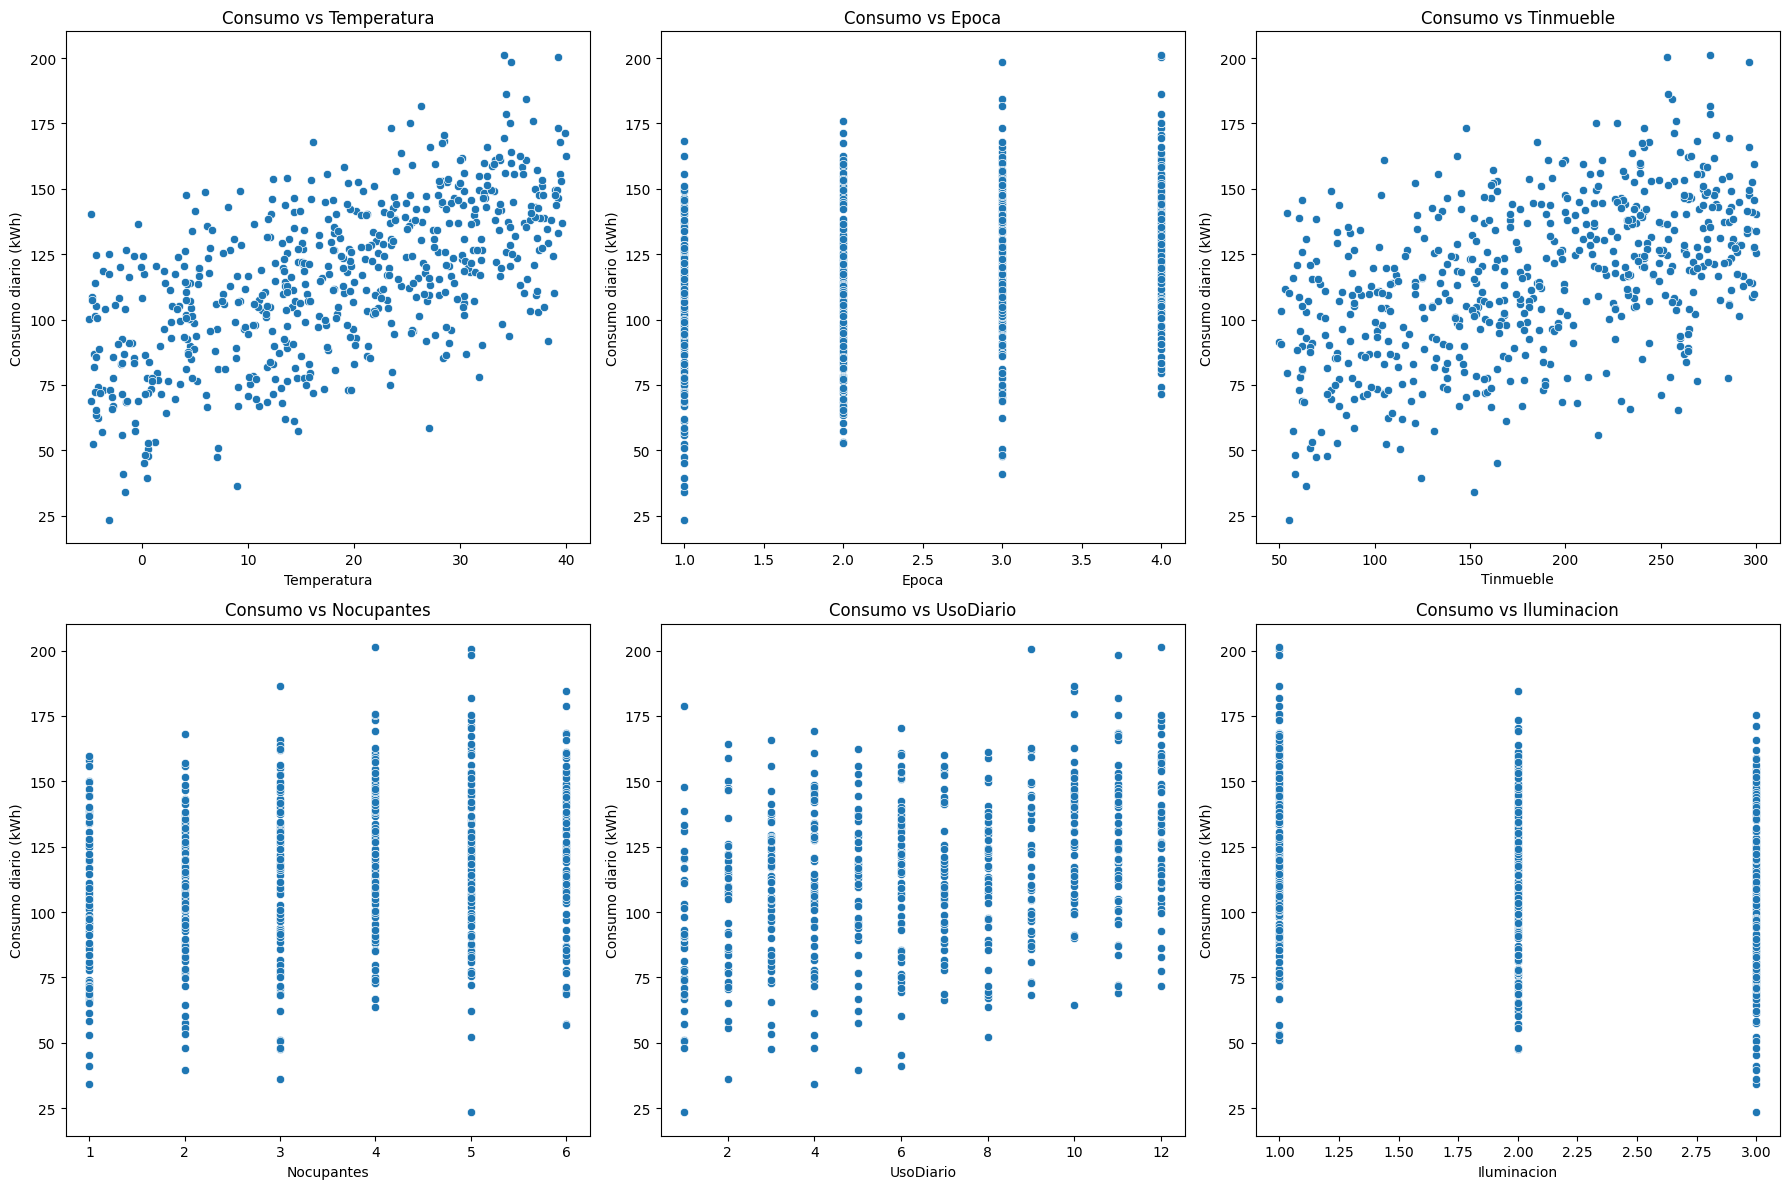

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Ajustamos el tamaño de la figura para mostrar 3 gráficos por fila
plt.figure(figsize=(18, 12))

# Lista de factores a analizar
factores = ["Temperatura", "Epoca", "Tinmueble",
            "Nocupantes", "UsoDiario", "Iluminacion"]

# Creamos un gráfico de dispersión para cada factor
for i, factor in enumerate(factores):
    plt.subplot(2, 3, i+1)
    sb.scatterplot(x=factor, y="ConsumoDiario", data=datos, palette="coolwarm")
    plt.title(f"Consumo vs {factor}")
    plt.xlabel(factor)
    plt.ylabel("Consumo diario (kWh)")

# Ajustamos el layout
plt.tight_layout()
plt.show()

In [ ]:
from re import X
# Caracteristicas (X), etiqueta (y)
X1 = datos["Temperatura"]
X2 = datos["Epoca"]
X3 = datos["Tinmueble"]
X4 = datos["Nocupantes"]
X5 = datos["UsoDiario"]
X6 = datos["Iluminacion"]
y = datos["ConsumoDiario"]

In [ ]:
# Procesamiento de cada factor por separado
X1_procesada = X1.values.reshape(-1, 1)
X2_procesada = X2.values.reshape(-1, 1)
X3_procesada = X3.values.reshape(-1, 1)
X4_procesada = X4.values.reshape(-1, 1)
X5_procesada = X5.values.reshape(-1, 1)
X6_procesada = X6.values.reshape(-1, 1)

# La variable dependiente (consumo diario)
y_procesada = y.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [ ]:
#Entrenamiento
from numpy import hstack

X_procesada = hstack([X1_procesada, X2_procesada, X3_procesada,
                      X4_procesada, X5_procesada, X6_procesada])

modelo.fit(X_procesada, y_procesada)

LinearRegression()

In [ ]:
# Datos de prueba (reemplaza con valores reales para probar el modelo)
nueva_muestra = [[27.54,1,288,6,1,3]]

# Realizamos la predicción
prediccion = modelo.predict(nueva_muestra)

# Mostramos el resultado
print(f"Predicción del consumo diario (kWh): {prediccion[0][0]:.2f}")

Predicción del consumo diario (kWh): 120.91


In [ ]:
modelo.score(X_procesada, y_procesada)

1.0

In [ ]:
# Función para generar recomendaciones
def generar_recomendacion(consumo):
    if consumo < 15:
        return "Eficiencia óptima. ¡Sigue así!"
    elif 15 <= consumo <= 30:
        return "Buen consumo, pero podrías reducirlo optimizando el uso de dispositivos electrónicos."
    else:
        return "Consumo elevado. Considera mejorar el aislamiento térmico y usar iluminación LED."

# Solicitar datos al usuario
print("Por favor, ingresa los siguientes datos para predecir tu consumo diario de energía:")

try:
    temperatura = float(input("Temperatura (°C): "))
    epoca = int(input("Época del año (1 = Invierno, 2 = Primavera, 3 = Verano, 4 = Otoño): "))
    tamaño = int(input("Tamaño del inmueble (m²): "))
    ocupantes = int(input("Número de ocupantes: "))
    uso_dispositivos = int(input("Uso de dispositivos electrónicos (horas diarias): "))
    iluminacion = int(input("Tipo de iluminación (1 = Incandescente, 2 = Fluorescente, 3 = LED): "))

    # Crear un arreglo con los datos ingresados
    datos_usuario = np.array([[temperatura, epoca, tamaño, ocupantes, uso_dispositivos, iluminacion]])

    # Realizar predicción
    prediccion = modelo.predict(datos_usuario)
    consumo_predicho = prediccion[0]
    recomendacion = generar_recomendacion(consumo_predicho)

    # Mostrar resultados
    print(f"\nPredicción de consumo diario: {consumo_predicho:.2f} kWh")
    print(f"Recomendación: {recomendacion}")

except ValueError:
    print("Error: Ingresaste un valor no válido. Por favor, asegúrate de ingresar números en los campos requeridos.")

Por favor, ingresa los siguientes datos para predecir tu consumo diario de energía:
Temperatura (°C): 14
Época del año (1 = Invierno, 2 = Primavera, 3 = Verano, 4 = Otoño): 1
Tamaño del inmueble (m²): 50
